# Machine Learning Final Project By Touhid Chowdhury and Shahran Islam
Touhid Chowdhury (mtc450@nyu.edu) 
Shahran Islam (ssi256@nyu.edu)
### Diabetes Dataset
The dataset used is taken from the hospital Frankfurt in Germany and gives the information of indivisuals and whether they have diabetes or not. The data can be found in the following link: https://www.kaggle.com/johndasilva/diabetes?fbclid=IwAR0GcfQcKbdraKwQEcVpuDH684N3EaoZVBb3lskSIHxmBmjlQSnBEidql2A
The classification task is to see whether we can use different techniques to classify if a person has diabetes or not. Different information about the indivisual will be used as features such as Number of pregnancies the indivisual had, Glucose level, Blood pressure, Skin thickness, insulin levels, BMI, Diabetes Pedigree function and lastly age. 


In [1]:
#Import Important Libraries
#Other Important libraries will be imported as we go on 
from sklearn.linear_model import LogisticRegression # Sklearn's logistic regression's module
from sklearn import preprocessing # Library to do necessary preprocessing to make sure to get accurate results
from sklearn.model_selection import train_test_split 
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import the dataset 
df= pd.read_csv("diabetes.csv")

In [3]:
print(df)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
5               0      173             78             32      265  46.5   
6               4       99             72             17        0  25.6   
7               8      194             80              0        0  26.1   
8               2       83             65             28       66  36.8   
9               2       89             90             30        0  33.5   
10              4       99             68             38        0  32.8   
11              4      125             70             18      122  28.9   
12              3       8

In [4]:
#remove any row that may have an empty value and understand data types of the features
df = df.dropna()
df.head(6)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 156.2 KB


In [5]:
#check the number of columns and rows after removing the rows with NAN values 
df.shape

(2000, 9)

# Data Preprocessing
Creating a matrix with the feature columns and a matrix with the outcome column into two seperate variables

In [6]:
outcome_column = df['Outcome']
y = outcome_column.values 
print(y)
print(y.shape)

[1 0 1 ... 0 1 0]
(2000,)


In [7]:
df3 = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [8]:
x = df3.values

In [9]:
print(x)
print(x.shape)

[[2.00e+00 1.38e+02 6.20e+01 ... 3.36e+01 1.27e-01 4.70e+01]
 [0.00e+00 8.40e+01 8.20e+01 ... 3.82e+01 2.33e-01 2.30e+01]
 [0.00e+00 1.45e+02 0.00e+00 ... 4.42e+01 6.30e-01 3.10e+01]
 ...
 [6.00e+00 8.50e+01 7.80e+01 ... 3.12e+01 3.82e-01 4.20e+01]
 [0.00e+00 1.29e+02 1.10e+02 ... 6.71e+01 3.19e-01 2.60e+01]
 [2.00e+00 8.10e+01 7.20e+01 ... 3.01e+01 5.47e-01 2.50e+01]]
(2000, 8)


In [10]:
y

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

Split the data between the training data that we learn with and the testing set that we will see how well we did. 80% of the data will be in the training set and 20% of the data will be in the test set. 
We will also normalize the data so that there all on the same scale. This is important because different features may have different ranges of values and without standardizing, one feature might dominate the other because its scale is much larger than the other feature. The standardization that were doing is Standardization which will find the mean and standard deviation and compute z = (x-u)/s for each examples feature. (Needed especially for algorithms that use Euclidean distance and also to allow converging quicker) 

In [11]:
#Feature scaling
#Will not need to do feature scaling for y since this is classification problem y will have only 1 and 0 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc_X = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(1600, 8) (400, 8) (1600,) (400,)


# Principal Component Analysis (PCA) for Dimensionality Reduction
Here, we used PCA to find out how many components do we need to keep to have 70% of the variance. PCA is known to be used for dimensionality reduction by transforming the variables to a NEW set of variables that are orthogonal to each other. As shown below, we see that we can transform into a 4-dimension plane from 8 dimension plane while still retaining 70% of the variance of the data. This is useful because it will reduce the computational cost AND if we can can reduce the dimensionality it can make the data more visible and easier to understand. What PCA does is that it essentially maximizes the variance of the projected data and at the same time, it minimizes the mean squared distance (minimize the information were losing) between the data point and its projection onto the line.

In [12]:
from sklearn.decomposition import PCA 

In [13]:
pca = PCA(0.70)
pca_x_train = pca.fit_transform(X_train)
pca_x_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [14]:
print(pca.n_components_)
print(explained_variance)

4
[0.25952398 0.21525901 0.12837415 0.11127328]


[0.25952398 0.47478299 0.60315714 0.71443042 0.81087184 0.89590815
 0.95017136 1.        ]


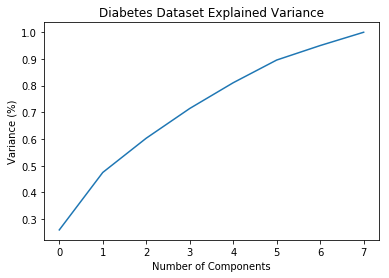

In [15]:
#Fitting the PCA algorithm with our Data
pca_1 = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
print(np.cumsum(pca_1.explained_variance_ratio_))
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Diabetes Dataset Explained Variance')
plt.show()

In [16]:
print(X_train)
print(pca_x_train)

[[-1.12562161  0.43101651 -0.06737747 ...  1.22237507 -0.32235227
  -0.7804616 ]
 [-0.52267733  0.09104024 -0.06737747 ...  0.07043385  1.26258556
  -0.26896301]
 [-0.82414947 -1.05251631 -0.48562753 ...  0.59738568  0.12515959
  -0.95096113]
 ...
 [ 1.28615553 -1.45430645  0.03718504 ...  0.3645465   0.73427295
   0.49828488]
 [-0.82414947 -0.95979551 -0.38106501 ... -0.88543226  2.48392001
  -0.69521183]
 [-1.12562161  1.82182853  0.4554351  ...  3.3179277   6.06401487
  -0.69521183]]
[[ 1.67071973 -1.90612065 -0.18311614 -0.98457418]
 [ 0.99945101 -1.01395029  0.77136804  0.69466796]
 [-0.04525459 -1.72305224 -0.77707861  0.4297641 ]
 ...
 [ 0.47082857  0.45056946 -1.01774041  1.49157512]
 [-0.59062215 -1.28118094  0.92370883  2.45936605]
 [ 4.72532886 -2.11875385  1.20535273  4.50163612]]


# Logistic Regression
The first technique we will try is logistic regression. Logistic Regression is a way of classification that provides a probability that a outcome is likely to occur. Logistic regression uses the Sigmoid function f(x) = (1/1 + e^x) to make the infinity continuum w^Tx into a 0 to 1 range. 

# Logistic Regression with Lasso (L1) Regularization.
Here we will use different values of C (C is the inverse of the parameter 'lambda') to find the best regularization parameter that will give the best accurate results for the test data. As the C increases (lambda going to zero), the regularization term goes to zero and we return back to our usual model without any regularization. The Lasso (L1) Regularization adds a absolute value |w_i| of the coefficients as the penalty to the Logistic Regression loss function.
One important idea to note is that Lasso can make some of the coefficents go to zero therefore providing feature selection.

In [17]:
# list to store values of training set accuracy.
acc_train_logreg = []
# list to store values of test set accuracy.
acc_test_logreg = []
# list to store values of parameter 'c'
c_logreg = []

In [18]:
from sklearn import linear_model

def logreg_model(c , X_train, Y_train, X_test, Y_test):
    #  C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 
    # means stronger regularization and large value means less regularization.

    logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')

    logreg.fit(X_train, Y_train)

    Yhat_train = logreg.predict(X_train)

    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    Yhat_test = logreg.predict(X_test)

    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

    c_logreg.append(c)

In [19]:
cVals = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c in cVals:
    print("Value of C: ", c)
    logreg_model(c, X_train, Y_train, X_test, Y_test)

Value of C:  1e-05
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.0001
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.001
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.01
Accuracy on training data = 0.752500
Accuracy on test data = 0.765000
Value of C:  0.1
Accuracy on training data = 0.778125
Accuracy on test data = 0.805000
Value of C:  1
Accuracy on training data = 0.779375
Accuracy on test data = 0.802500
Value of C:  10
Accuracy on training data = 0.778125
Accuracy on test data = 0.802500
Value of C:  100
Accuracy on training data = 0.778125
Accuracy on test data = 0.802500
Value of C:  1000
Accuracy on training data = 0.778125
Accuracy on test data = 0.802500


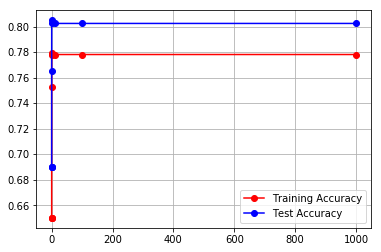

In [20]:
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistic Regression with Ridge (L2) Normalization.
Ridge Normalization is different from Lasso in that its penalty term is (w_i^2). Just like Lasso (L1) normalization, as the C increases (lambda going to zero since C = 1/(λ)), the regularization term begins to decrease and go to zero leading to the Logistic Regression without any regularization. 

In [99]:
# list to store values of training set accuracy.
acc_train_logreg2 = []
# list to store values of test set accuracy.
acc_test_logreg2 = []
# list to store values of parameter 'c'.
c_logreg2 = []

In [102]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):

    # penalty is 'L2' by default.
    logreg2 = linear_model.LogisticRegression(C=c,penalty='l2', warm_start=True, solver = 'sag')
    
    logreg2.fit(X_train, Y_train)
    
    Yhat_train = logreg2.predict(X_train)
    
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg2.append(c)

In [103]:
for c in cVals:
    print("Value of C: ", c)
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

Value of C:  1e-05
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.0001
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.001
Accuracy on training data = 0.689375
Accuracy on test data = 0.722500
Value of C:  0.01
Accuracy on training data = 0.771875
Accuracy on test data = 0.802500
Value of C:  0.1
Accuracy on training data = 0.778750
Accuracy on test data = 0.805000
Value of C:  1
Accuracy on training data = 0.778125
Accuracy on test data = 0.802500
Value of C:  10
Accuracy on training data = 0.778125
Accuracy on test data = 0.802500
Value of C:  100
Accuracy on training data = 0.778125
Accuracy on test data = 0.802500
Value of C:  1000
Accuracy on training data = 0.778125
Accuracy on test data = 0.802500


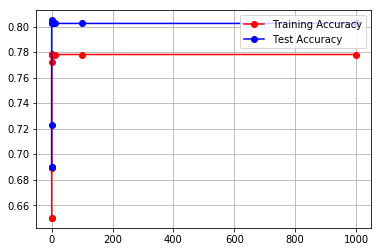

In [104]:
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistic Regression Using Polynomial Feature Transformation
Often we would like to transform our features onto another feature space so that the points are linearly seperable. We also have to keep in mind that we may end up overfitting if we make the model to complex and flexible. 

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly = PolynomialFeatures(degree=2)

In [66]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [67]:
print(X_transformed_train.shape)
print(X_transformed_test.shape)

(1600, 45)
(400, 45)


### Logistic Regression Using Polynomial Feature Transformation with Lasso (L1) Regularization


Value of C:  1e-05
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.0001
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.001
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.01


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.767500
Accuracy on test data = 0.772500
Value of C:  0.1


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.798125
Accuracy on test data = 0.802500
Value of C:  1


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.805625
Accuracy on test data = 0.822500
Value of C:  10


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.801250
Accuracy on test data = 0.815000
Value of C:  100


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.802500
Accuracy on test data = 0.815000
Value of C:  1000
Accuracy on training data = 0.802500
Accuracy on test data = 0.815000


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


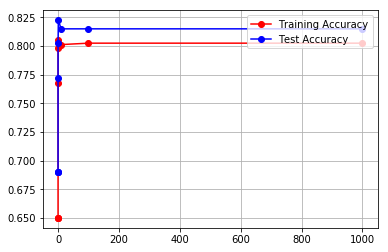

In [68]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []


for c in cVals:
    print("Value of C: ", c)
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    

plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

### Logistic Regression Using Polynomial Feature Transformation with Ridge (L2) Regularization

Value of C:  1e-05
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.0001
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.001
Accuracy on training data = 0.650000
Accuracy on test data = 0.690000
Value of C:  0.01


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.767500
Accuracy on test data = 0.772500
Value of C:  0.1


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.798125
Accuracy on test data = 0.802500
Value of C:  1


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.805625
Accuracy on test data = 0.822500
Value of C:  10


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.801250
Accuracy on test data = 0.815000
Value of C:  100


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.802500
Accuracy on test data = 0.815000
Value of C:  1000
Accuracy on training data = 0.802500
Accuracy on test data = 0.815000


C:\Users\Touhid\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


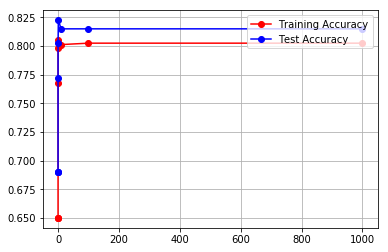

In [70]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []


for c in cVals:
    print("Value of C: ", c)
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machines (SVM) 
SVM will solve the classification problem in a different way. The way that this will be done is through finding a maximum margin that will give the best distance between the points to the line. The points that are on the margin are known as 'support vector machines' because they are the points that define the line and removing or adding other points will not change that margin. The line is usually known as 'maximum margin classifier'. The examples that are on the support vectors are close to the boundary so they provide the extreme example that helps define future examples.

### SVM using Linear Kernel 

In [31]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

In [32]:
from sklearn import svm


def svm_linear(c):
    
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc_linear.fit(X_train, Y_train)
    
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)

In [33]:
for c in cVals:
    print("Value of C: ", c)
    svm_linear(c)

Value of C:  1e-05
Train Accuracy = 0.650000
Test Accuracy = 0.690000
Value of C:  0.0001
Train Accuracy = 0.650000
Test Accuracy = 0.690000
Value of C:  0.001
Train Accuracy = 0.678125
Test Accuracy = 0.717500
Value of C:  0.01
Train Accuracy = 0.771250
Test Accuracy = 0.800000
Value of C:  0.1
Train Accuracy = 0.768125
Test Accuracy = 0.795000
Value of C:  1
Train Accuracy = 0.770000
Test Accuracy = 0.792500
Value of C:  10
Train Accuracy = 0.771875
Test Accuracy = 0.792500
Value of C:  100
Train Accuracy = 0.771875
Test Accuracy = 0.792500
Value of C:  1000
Train Accuracy = 0.771875
Test Accuracy = 0.792500


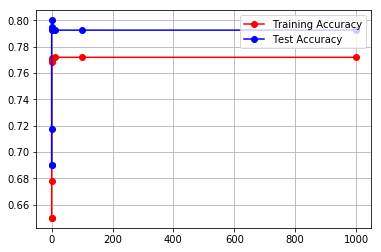

In [34]:
plt.plot(c_svm_linear, acc_train_svm_linear, 'ro-') 
plt.plot(c_svm_linear, acc_test_svm_linear,'bo-') 
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

### SVM using Radial Basis Function(RBF) Kernel.
The SVM using Radial Basis Function is one way that the kernel trick is being implemented. ...

In [35]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

In [36]:
from sklearn import svm


def svm_rbf(c):
    
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    svc_rbf.fit(X_train, Y_train)
    
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = np.mean(Yhat_svc_rbf_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = np.mean(Yhat_svc_rbf_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)

In [37]:
for c in cVals:
    print("Value of C: ", c)
    svm_rbf(c)

Value of C:  1e-05
Train Accuracy = 0.650000
Test Accuracy = 0.690000
Value of C:  0.0001
Train Accuracy = 0.650000
Test Accuracy = 0.690000
Value of C:  0.001
Train Accuracy = 0.650000
Test Accuracy = 0.690000
Value of C:  0.01
Train Accuracy = 0.650000
Test Accuracy = 0.690000
Value of C:  0.1
Train Accuracy = 0.808750
Test Accuracy = 0.822500
Value of C:  1
Train Accuracy = 0.848125
Test Accuracy = 0.842500
Value of C:  10
Train Accuracy = 0.918750
Test Accuracy = 0.897500
Value of C:  100
Train Accuracy = 0.977500
Test Accuracy = 0.947500
Value of C:  1000
Train Accuracy = 1.000000
Test Accuracy = 0.970000


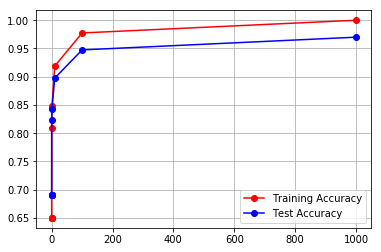

In [38]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, 'ro-') 
plt.plot(c_svm_rbf, acc_test_svm_rbf,'bo-') 
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

### SVM using Polynomial Kernel
Another type of Kernel trick in SVM....


In [39]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [40]:
def svm_polynomial(c):

    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)

    # Fitting the classifier on the training set 
    svc_polynomial.fit(X_train, Y_train)
    
    # prediction and accuracy on the training set 
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = np.mean(Yhat_svc_poly_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # prediction and accuracy on the test set 
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = np.mean(Yhat_svc_poly_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)

In [41]:
######********cVals = np.geomspace(0.000001, 0.001, 5)************
for c in cVals:
    print("Value of C: ", c)
    svm_polynomial(c)
print(c_svm_poly)
print(acc_train_svm_poly) 

Value of C:  1e-05
Train Accuracy = 0.650000
Test Accuracy = 0.690000
Value of C:  0.0001
Train Accuracy = 0.650000
Test Accuracy = 0.690000
Value of C:  0.001
Train Accuracy = 0.651250
Test Accuracy = 0.687500
Value of C:  0.01
Train Accuracy = 0.695000
Test Accuracy = 0.712500
Value of C:  0.1
Train Accuracy = 0.768750
Test Accuracy = 0.782500
Value of C:  1
Train Accuracy = 0.826875
Test Accuracy = 0.815000
Value of C:  10
Train Accuracy = 0.843125
Test Accuracy = 0.810000
Value of C:  100
Train Accuracy = 0.857500
Test Accuracy = 0.840000
Value of C:  1000
Train Accuracy = 0.853750
Test Accuracy = 0.825000
[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
[0.65, 0.65, 0.65125, 0.695, 0.76875, 0.826875, 0.843125, 0.8575, 0.85375]


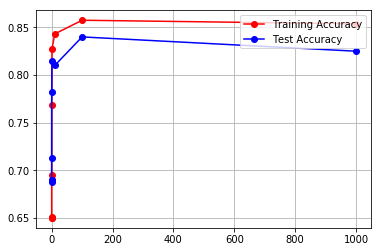

In [42]:
plt.plot(c_svm_poly, acc_train_svm_poly, 'ro-') 
plt.plot(c_svm_poly, acc_test_svm_poly,'bo-') 
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Neural Networks 
Neural Networks take intuition from the biological "neuron" that is found in the brain. 


In [43]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [44]:
# remove any existing graph and create new one; avoids clutter from old models
import keras.backend as K
K.clear_session()

In [45]:
#need to find the dimension of the data to input the neural network for layer 0 (also called layer 1)
print(X_train.shape[1])

8


##  Neural Network using Sigmoid function 

In [46]:
def neuralNetwork_Sigmoid(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network 
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1 
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dense(200, activation='sigmoid'))
    model.add(Dense(200, activation='sigmoid', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history 

In [47]:
history_sigmoid = neuralNetwork_Sigmoid(X_train, Y_train, X_test, Y_test)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               1800      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
hidden (Dense)               (None, 200)               40200     
_________________________________________________________________
output (Dense)               (None, 2)                 402       
Total params: 82,602
Trainable params: 82,602
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6355 - acc: 0.6438 - val

Epoch 50/200
1600/1600 [==============================] - 1s 553us/step - loss: 0.4135 - acc: 0.7781 - val_loss: 0.4232 - val_acc: 0.8025
Epoch 51/200
1600/1600 [==============================] - 1s 485us/step - loss: 0.4117 - acc: 0.7812 - val_loss: 0.4145 - val_acc: 0.8050
Epoch 52/200
1600/1600 [==============================] - 1s 325us/step - loss: 0.4108 - acc: 0.7869 - val_loss: 0.4177 - val_acc: 0.8000
Epoch 53/200
1600/1600 [==============================] - 1s 339us/step - loss: 0.4093 - acc: 0.7800 - val_loss: 0.4151 - val_acc: 0.8050
Epoch 54/200
1600/1600 [==============================] - 1s 319us/step - loss: 0.4093 - acc: 0.7812 - val_loss: 0.4330 - val_acc: 0.8075
Epoch 55/200
1600/1600 [==============================] - 1s 470us/step - loss: 0.4045 - acc: 0.7844 - val_loss: 0.4221 - val_acc: 0.7975
Epoch 56/200
1600/1600 [==============================] - 1s 454us/step - loss: 0.4066 - acc: 0.7894 - val_loss: 0.4198 - val_acc: 0.8075
Epoch 57/200
1600/1600 [==========

Epoch 168/200
1600/1600 [==============================] - 1s 462us/step - loss: 0.1597 - acc: 0.8625 - val_loss: 0.3868 - val_acc: 0.8700
Epoch 169/200
1600/1600 [==============================] - 0s 308us/step - loss: 0.1648 - acc: 0.8619 - val_loss: 0.3595 - val_acc: 0.8800
Epoch 170/200
1600/1600 [==============================] - 1s 613us/step - loss: 0.1588 - acc: 0.8625 - val_loss: 0.3762 - val_acc: 0.8700
Epoch 171/200
1600/1600 [==============================] - 1s 319us/step - loss: 0.1515 - acc: 0.8669 - val_loss: 0.3623 - val_acc: 0.8825
Epoch 172/200
1600/1600 [==============================] - 0s 300us/step - loss: 0.1474 - acc: 0.8662 - val_loss: 0.3715 - val_acc: 0.8850
Epoch 173/200
1600/1600 [==============================] - 0s 309us/step - loss: 0.1466 - acc: 0.8719 - val_loss: 0.4177 - val_acc: 0.8675
Epoch 174/200
1600/1600 [==============================] - 0s 296us/step - loss: 0.1725 - acc: 0.8625 - val_loss: 0.3900 - val_acc: 0.8825
Epoch 175/200
1600/1600 [==

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


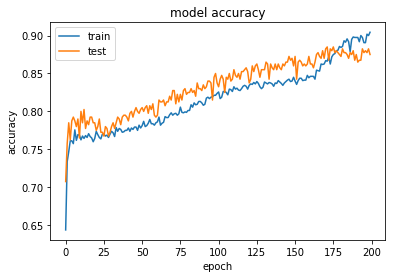

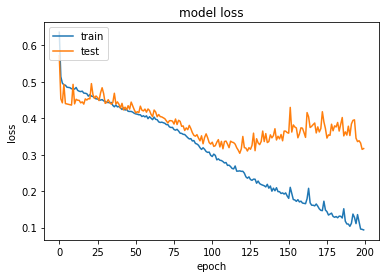

In [48]:
print(history_sigmoid.history.keys())
# plot the history for accuracy of train and test data
plt.plot(history_sigmoid.history['acc'])
plt.plot(history_sigmoid.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the history for loss of train and test data 
plt.plot(history_sigmoid.history['loss'])
plt.plot(history_sigmoid.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(1600, 8) (400, 8) (1600,) (400,)


## Neural Network using Relu Function

In [79]:
def neuralNetwork_Relu(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network 
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1 
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history 

In [84]:
K.clear_session()
history_Relu = neuralNetwork_Relu(X_train, Y_train, X_test, Y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               1800      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
hidden (Dense)               (None, 200)               40200     
_________________________________________________________________
output (Dense)               (None, 2)                 402       
Total params: 82,602
Trainable params: 82,602
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 1s 897us/step - loss: 0.4911 - acc: 0.7694 - val_loss: 0.4439 - val_acc: 0.8000
Epoch 2/200
1600/1600 [==============================] - 1s 349us/step - loss: 0.4346 

Epoch 111/200
1600/1600 [==============================] - 1s 367us/step - loss: 1.1479e-06 - acc: 1.0000 - val_loss: 0.3594 - val_acc: 0.9625
Epoch 112/200
1600/1600 [==============================] - 1s 491us/step - loss: 1.0515e-06 - acc: 1.0000 - val_loss: 0.3602 - val_acc: 0.9625
Epoch 113/200
1600/1600 [==============================] - 1s 466us/step - loss: 9.8422e-07 - acc: 1.0000 - val_loss: 0.3596 - val_acc: 0.9675
Epoch 114/200
1600/1600 [==============================] - 1s 587us/step - loss: 9.0591e-07 - acc: 1.0000 - val_loss: 0.3619 - val_acc: 0.9625
Epoch 115/200
1600/1600 [==============================] - 1s 343us/step - loss: 8.5465e-07 - acc: 1.0000 - val_loss: 0.3632 - val_acc: 0.9625
Epoch 116/200
1600/1600 [==============================] - 1s 335us/step - loss: 7.9281e-07 - acc: 1.0000 - val_loss: 0.3636 - val_acc: 0.9675
Epoch 117/200
1600/1600 [==============================] - 1s 349us/step - loss: 7.3626e-07 - acc: 1.0000 - val_loss: 0.3648 - val_acc: 0.9625

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


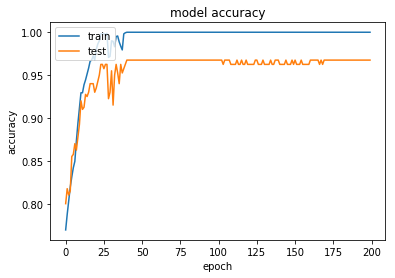

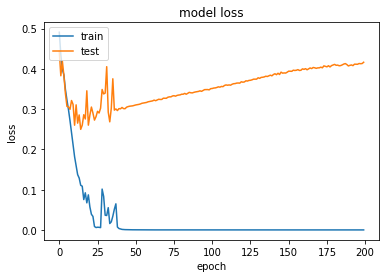

In [85]:
print(history_Relu.history.keys())
# plot the history for accuracy of train and test data
plt.plot(history_Relu.history['acc'])
plt.plot(history_Relu.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the history for loss of train and test data 
plt.plot(history_Relu.history['loss'])
plt.plot(history_Relu.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Neural Network using Tanh Function

In [53]:
def neuralNetwork_tanh(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network 
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1 
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history 

In [54]:
K.clear_session()
history_tanh = neuralNetwork_tanh(X_train, Y_train, X_test, Y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               1800      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
hidden (Dense)               (None, 200)               40200     
_________________________________________________________________
output (Dense)               (None, 2)                 402       
Total params: 82,602
Trainable params: 82,602
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 2s 976us/step - loss: 0.5840 - acc: 0.6944 - val_loss: 0.5207 - val_acc: 0.7475
Epoch 2/200
1600/1600 [==============================] - 1s 455us/step - loss: 0.5101 

1600/1600 [==============================] - 1s 698us/step - loss: 0.1290 - acc: 0.9431 - val_loss: 0.3415 - val_acc: 0.9050
Epoch 113/200
1600/1600 [==============================] - 1s 707us/step - loss: 0.1213 - acc: 0.9456 - val_loss: 0.3514 - val_acc: 0.9000
Epoch 114/200
1600/1600 [==============================] - 1s 482us/step - loss: 0.1337 - acc: 0.9419 - val_loss: 0.3433 - val_acc: 0.9100
Epoch 115/200
1600/1600 [==============================] - 1s 513us/step - loss: 0.1149 - acc: 0.9487 - val_loss: 0.3282 - val_acc: 0.9100
Epoch 116/200
1600/1600 [==============================] - 1s 493us/step - loss: 0.1130 - acc: 0.9537 - val_loss: 0.3156 - val_acc: 0.9075
Epoch 117/200
1600/1600 [==============================] - 1s 642us/step - loss: 0.1122 - acc: 0.9525 - val_loss: 0.3559 - val_acc: 0.9075
Epoch 118/200
1600/1600 [==============================] - 2s 983us/step - loss: 0.1353 - acc: 0.9381 - val_loss: 0.3500 - val_acc: 0.9025
Epoch 119/200
1600/1600 [================

1600/1600 [==============================] - 0s 312us/step - loss: 0.0391 - acc: 0.9737 - val_loss: 0.3717 - val_acc: 0.9300
Epoch 172/200
1600/1600 [==============================] - 0s 304us/step - loss: 0.0363 - acc: 0.9775 - val_loss: 0.3271 - val_acc: 0.9350
Epoch 173/200
1600/1600 [==============================] - 1s 344us/step - loss: 0.0371 - acc: 0.9781 - val_loss: 0.3507 - val_acc: 0.9275
Epoch 174/200
1600/1600 [==============================] - 1s 482us/step - loss: 0.0354 - acc: 0.9781 - val_loss: 0.3371 - val_acc: 0.9275
Epoch 175/200
1600/1600 [==============================] - 1s 379us/step - loss: 0.0339 - acc: 0.9775 - val_loss: 0.3741 - val_acc: 0.9300
Epoch 176/200
1600/1600 [==============================] - 1s 505us/step - loss: 0.0389 - acc: 0.9750 - val_loss: 0.3882 - val_acc: 0.9250
Epoch 177/200
1600/1600 [==============================] - 1s 700us/step - loss: 0.0606 - acc: 0.9675 - val_loss: 0.3644 - val_acc: 0.9300
Epoch 178/200
1600/1600 [================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


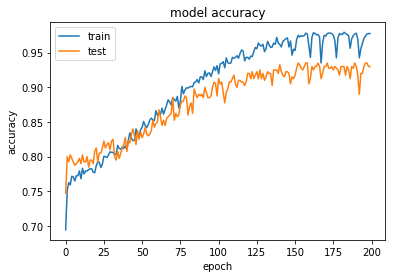

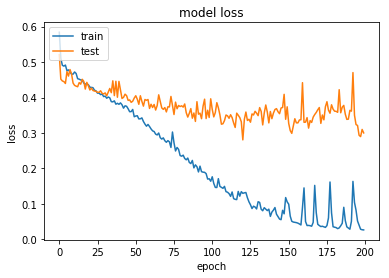

In [55]:
print(history_tanh.history.keys())
# plot the history for accuracy of train and test data
plt.plot(history_tanh.history['acc'])
plt.plot(history_tanh.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the history for loss of train and test data 
plt.plot(history_tanh.history['loss'])
plt.plot(history_tanh.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Neural network with More Neurons in each layer 
Lets run the neural networks with more neurons on each layer to see how the outcome may change. 

# Neural Network with Sigmoid (Increased Neurons on layers)

In [71]:
def neuralNetwork_Sigmoid_Increase(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network 
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1 
    model = Sequential()
    model.add(Dense(500, input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dense(500, activation='sigmoid'))
    model.add(Dense(500, activation='sigmoid', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history 

In [72]:
K.clear_session()
history_sigmoid_increase = neuralNetwork_Sigmoid_Increase(X_train, Y_train, X_test, Y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
hidden (Dense)               (None, 500)               250500    
_________________________________________________________________
output (Dense)               (None, 2)                 1002      
Total params: 506,502
Trainable params: 506,502
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6303 - acc: 0.6481 - val_loss: 0.5313 - val_acc: 0.7500
Epoch 2/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5354 - 

1600/1600 [==============================] - 2s 1ms/step - loss: 0.3193 - acc: 0.7931 - val_loss: 0.4347 - val_acc: 0.8100
Epoch 115/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3089 - acc: 0.7925 - val_loss: 0.4268 - val_acc: 0.8125
Epoch 116/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3155 - acc: 0.7944 - val_loss: 0.4172 - val_acc: 0.8125
Epoch 117/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3132 - acc: 0.7931 - val_loss: 0.4350 - val_acc: 0.8150
Epoch 118/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2990 - acc: 0.7937 - val_loss: 0.4359 - val_acc: 0.8125
Epoch 119/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2959 - acc: 0.7962 - val_loss: 0.4078 - val_acc: 0.8175
Epoch 120/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3078 - acc: 0.7912 - val_loss: 0.4010 - val_acc: 0.8100
Epoch 121/200
1600/1600 [==============================

Epoch 174/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2655 - acc: 0.7975 - val_loss: 0.4247 - val_acc: 0.8175
Epoch 175/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2396 - acc: 0.8031 - val_loss: 0.4464 - val_acc: 0.8175
Epoch 176/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2280 - acc: 0.8019 - val_loss: 0.4758 - val_acc: 0.8150
Epoch 177/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2186 - acc: 0.8031 - val_loss: 0.4305 - val_acc: 0.8200
Epoch 178/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2225 - acc: 0.8062 - val_loss: 0.4232 - val_acc: 0.8225
Epoch 179/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2231 - acc: 0.8031 - val_loss: 0.4428 - val_acc: 0.8175
Epoch 180/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2118 - acc: 0.8031 - val_loss: 0.4457 - val_acc: 0.8175
Epoch 181/200
1600/1600 [================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


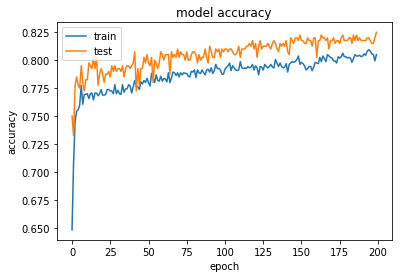

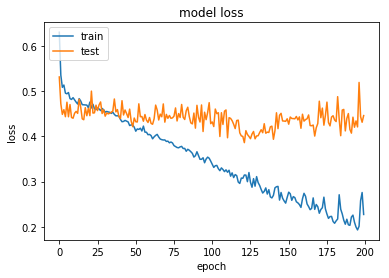

In [73]:
print(history_sigmoid_increase.history.keys())
# plot the history for accuracy of train and test data
plt.plot(history_sigmoid_increase.history['acc'])
plt.plot(history_sigmoid_increase.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the history for loss of train and test data 
plt.plot(history_sigmoid_increase.history['loss'])
plt.plot(history_sigmoid_increase.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Neural Network with Relu (Increased Neurons on layers)

In [74]:
def neuralNetwork_Relu_Increase(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network 
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1 
    model = Sequential()
    model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(500, activation='relu', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history 

In [75]:
K.clear_session()
history_Relu_increase = neuralNetwork_Relu_Increase(X_train, Y_train, X_test, Y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
hidden (Dense)               (None, 500)               250500    
_________________________________________________________________
output (Dense)               (None, 2)                 1002      
Total params: 506,502
Trainable params: 506,502
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 4s 2ms/step - loss: 0.5028 - acc: 0.7500 - val_loss: 0.4435 - val_acc: 0.7950
Epoch 2/200
1600/1600 [==============================] - 2s 2ms/step - loss: 0.4525 - 

1600/1600 [==============================] - 2s 1ms/step - loss: 3.7059e-07 - acc: 1.0000 - val_loss: 0.4057 - val_acc: 0.9675
Epoch 113/200
1600/1600 [==============================] - 2s 1ms/step - loss: 3.4302e-07 - acc: 1.0000 - val_loss: 0.4056 - val_acc: 0.9675
Epoch 114/200
1600/1600 [==============================] - 2s 1ms/step - loss: 3.3274e-07 - acc: 1.0000 - val_loss: 0.4065 - val_acc: 0.9675
Epoch 115/200
1600/1600 [==============================] - 2s 1ms/step - loss: 3.1389e-07 - acc: 1.0000 - val_loss: 0.4073 - val_acc: 0.9675
Epoch 116/200
1600/1600 [==============================] - 2s 1ms/step - loss: 3.0190e-07 - acc: 1.0000 - val_loss: 0.4082 - val_acc: 0.9675
Epoch 117/200
1600/1600 [==============================] - 2s 1ms/step - loss: 2.8752e-07 - acc: 1.0000 - val_loss: 0.4090 - val_acc: 0.9675
Epoch 118/200
1600/1600 [==============================] - 3s 2ms/step - loss: 2.7336e-07 - acc: 1.0000 - val_loss: 0.4092 - val_acc: 0.9675s - loss: 2
Epoch 119/200
16

1600/1600 [==============================] - 4s 3ms/step - loss: 1.2092e-07 - acc: 1.0000 - val_loss: 0.4353 - val_acc: 0.9625
Epoch 171/200
1600/1600 [==============================] - 2s 1ms/step - loss: 1.2122e-07 - acc: 1.0000 - val_loss: 0.4357 - val_acc: 0.9625
Epoch 172/200
1600/1600 [==============================] - 3s 2ms/step - loss: 1.2062e-07 - acc: 1.0000 - val_loss: 0.4356 - val_acc: 0.9625
Epoch 173/200
1600/1600 [==============================] - 2s 1ms/step - loss: 1.2100e-07 - acc: 1.0000 - val_loss: 0.4348 - val_acc: 0.9625
Epoch 174/200
1600/1600 [==============================] - 2s 1ms/step - loss: 1.2062e-07 - acc: 1.0000 - val_loss: 0.4361 - val_acc: 0.9625
Epoch 175/200
1600/1600 [==============================] - 2s 1ms/step - loss: 1.2092e-07 - acc: 1.0000 - val_loss: 0.4386 - val_acc: 0.9625
Epoch 176/200
1600/1600 [==============================] - 2s 1ms/step - loss: 1.2062e-07 - acc: 1.0000 - val_loss: 0.4385 - val_acc: 0.9625
Epoch 177/200
1600/1600 [==

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


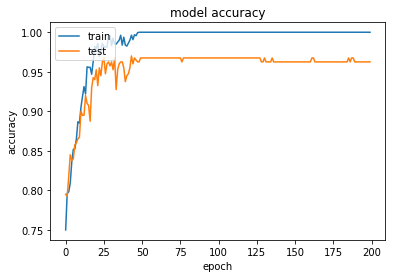

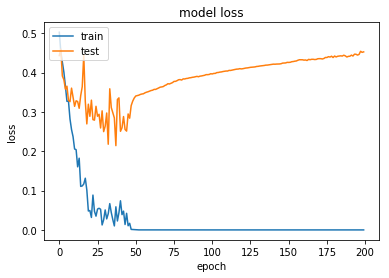

In [76]:
print(history_Relu_increase.history.keys())
# plot the history for accuracy of train and test data
plt.plot(history_Relu_increase.history['acc'])
plt.plot(history_Relu_increase.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the history for loss of train and test data 
plt.plot(history_Relu_increase.history['loss'])
plt.plot(history_Relu_increase.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Neural Network with tanh (Increased Neurons on layers)

In [77]:
def neuralNetwork_tanh_Increase(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network 
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1 
    model = Sequential()
    model.add(Dense(500, input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(500, activation='relu', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history 

In [87]:
K.clear_session()
history_tanh_increase = neuralNetwork_tanh_Increase(X_train, Y_train, X_test, Y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
hidden (Dense)               (None, 500)               250500    
_________________________________________________________________
output (Dense)               (None, 2)                 1002      
Total params: 506,502
Trainable params: 506,502
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6448 - acc: 0.6500 - val_loss: 0.5718 - val_acc: 0.6900
Epoch 2/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5433 - 

1600/1600 [==============================] - 2s 1ms/step - loss: 0.2763 - acc: 0.8725 - val_loss: 0.3648 - val_acc: 0.8500
Epoch 114/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2754 - acc: 0.8675 - val_loss: 0.3620 - val_acc: 0.8675
Epoch 115/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2598 - acc: 0.8769 - val_loss: 0.3814 - val_acc: 0.8800
Epoch 116/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2553 - acc: 0.8800 - val_loss: 0.3422 - val_acc: 0.8825
Epoch 117/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2616 - acc: 0.8725 - val_loss: 0.3785 - val_acc: 0.8650
Epoch 118/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2625 - acc: 0.8656 - val_loss: 0.3908 - val_acc: 0.8625
Epoch 119/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2508 - acc: 0.8787 - val_loss: 0.3604 - val_acc: 0.8750
Epoch 120/200
1600/1600 [==============================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


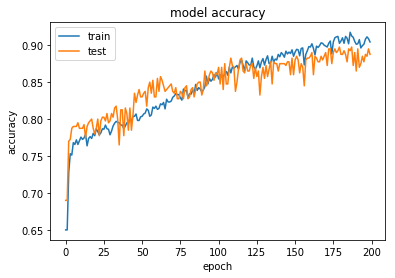

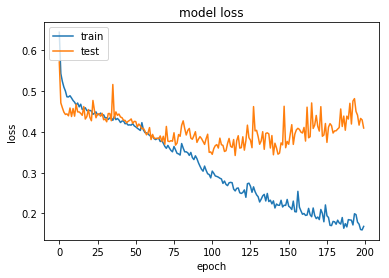

In [88]:
print(history_tanh_increase.history.keys())
# plot the history for accuracy of train and test data
plt.plot(history_tanh_increase.history['acc'])
plt.plot(history_tanh_increase.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the history for loss of train and test data 
plt.plot(history_tanh_increase.history['loss'])
plt.plot(history_tanh_increase.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# K-mean Clustering 
Find the number of clusters that minimizes the within-cluster sum of squares (WCSS). Method used below is known as the elbow method.

Code adapted from Professor Sellie's slides and website:
https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

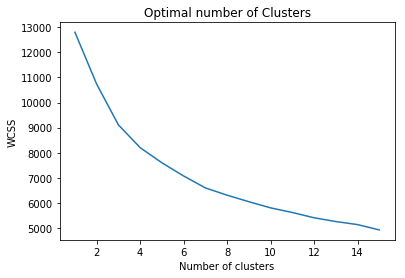

[12800.000000000007, 10733.21534763878, 9110.328356317073, 8201.762846178135, 7599.2384357401, 7074.120080837967, 6598.18293031545, 6308.721400287048, 6048.387612797396, 5802.839282505491, 5618.6948533573495, 5408.221545038678, 5257.798939893561, 5136.497074100018, 4924.347488582413]


In [105]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Optimal number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print(wcss)

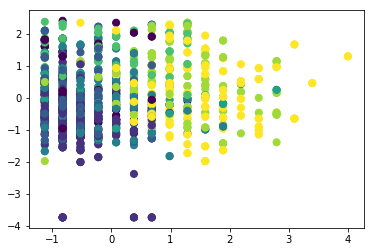

In [106]:
X_copy = X_train
kmeans = KMeans(n_clusters=8).fit(X_copy)
allLabels = kmeans.labels_
allCenters = kmeans.cluster_centers_
plt.scatter(X_copy[:,0], X_copy[:,1], c= allLabels, s = 50, cmap = 'viridis');